In [125]:
import pandas as pd
import numpy as np

from scipy import interpolate

In [209]:
# Simple case, no blend option
def mag_at_peak(u_0, mag_baseline):
    A = (u_0**2 + 2.) / (u_0 * np.sqrt(u_0**2 + 4.))
    mag = mag_baseline - (2.5 * np.log10(A))
    return mag

In [271]:
x = [16., 20.]
y = [1., 48.]
f = interpolate.interp1d(x, y)

def soar_etc(mag):
    if (mag>=17.) and (mag<=20.):
        time = f(mag)
    else:
        time = 0
    return time

In [211]:
def microlensing_mag(t, t_0, u_0, t_E, mag_baseline):
    tau = (t - t_0) / t_E
    u = np.sqrt(tau**2 + u_0**2)
    A = (u**2 + 2.) / (u * np.sqrt(u**2 + 4.))
    return mag_baseline - (2.5 * np.log10(A))

## Load data

In [212]:
fname = "omega_ii.csv"
data = pd.read_csv(fname, header=0)

In [213]:
for val in data.columns:
    print(val)

name
type
created
modified
ra
dec
epoch
parallax
pm_ra
pm_dec
galactic_lng
galactic_lat
distance
distance_err
scheme
epoch_of_elements
mean_anomaly
arg_of_perihelion
eccentricity
lng_asc_node
inclination
mean_daily_motion
semimajor_axis
epoch_of_perihelion
ephemeris_period
ephemeris_period_err
ephemeris_epoch
ephemeris_epoch_err
perihdist
basetarget_ptr
alive
classification
category
observing_mode
sky_location
t0
t0_error
u0
u0_error
tE
tE_error
piEN
piEN_error
piEE
piEE_error
rho
rho_error
s
s_error
q
q_error
alpha
alpha_error
source_magnitude
source_mag_error
blend_magnitude
blend_mag_error
baseline_magnitude
baseline_mag_error
gaia_source_id
gmag
gmag_error
rpmag
rpmag_error
bpmag
bpmag_error
bprp
bprp_error
reddening_bprp
extinction_g
teff
logg
metallicity
ruwe
fit_covariance
tap_priority
tap_priority_error
tap_priority_longte
tap_priority_longte_error
interferometry_mode
interferometry_guide_star
interferometry_candidate
spectras
last_fit
chi2
red_chi2
ks_test
sw_test
ad_test
late

In [214]:
data["created"] = pd.to_datetime(data["created"])

## 2024A Semester targets with 17 < mag_peak < 21

In [272]:
mask = (data['created'] > '2024-02-01') & (data['created'] <= '2024-07-31')

In [273]:
sem_2024A = data[mask]

In [274]:
mag_peak = []
for i in range(len(sem_2024A["u0"])):
    mag = mag_at_peak(sem_2024A["u0"].values[i], sem_2024A["baseline_magnitude"].values[i])
    mag_peak.append(mag)
    # print(mag_peak[-1])

/tmp/ipykernel_13877/1237312328.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  A = (u_0**2 + 2.) / (u_0 * np.sqrt(u_0**2 + 4.))


In [275]:
sem_2024A["mag_peak"] = mag_peak

/tmp/ipykernel_13877/850467683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_2024A["mag_peak"] = mag_peak


In [276]:
for i in range(len(sem_2024A["u0"])):
    if "Microlensing" in sem_2024A["classification"].values[i]:
        print(i+1, sem_2024A["name"].values[i], sem_2024A["baseline_magnitude"].values[i], sem_2024A["mag_peak"].values[i])

2 MOA-2024-BLG-019 15.378 -inf
3 OGLE-2024-GD-0010 20.146 -inf
4 OGLE-2024-GD-0009 19.036 14.765929855878905
5 OGLE-2024-BLG-0784 18.449 14.750415854973312
6 OGLE-2024-BLG-0724 17.983 15.928826539568016
7 OGLE-2024-BLG-0606 19.613 16.149025753294357
8 OGLE-2024-BLG-0605 15.94 15.02308880207954
9 OGLE-2024-BLG-0604 17.576 16.55313919591707
10 OGLE-2024-BLG-0592 14.633 13.900539196435956
11 OGLE-2024-BLG-0576 19.45 17.05052696505585
12 ZTF24aaiafkl 0.0 -inf
13 OGLE-2024-BLG-0485 18.808 16.230555346015656
14 OGLE-2024-BLG-0417 18.543 17.681599044596673
15 OGLE-2024-BLG-0416 17.464 15.506402693821233
16 OGLE-2024-BLG-0394 17.877 17.710572565093596
17 OGLE-2024-DG-0011 15.541 14.0438221074346
18 OGLE-2024-BLG-0341 18.107 16.203387839099907
19 OGLE-2024-BLG-0324 17.282 16.229436483531842
20 OGLE-2024-BLG-0280 16.718 16.619533742018685
21 OGLE-2024-DG-0005 17.951 16.887720094305802
22 OGLE-2024-DG-0004 16.855 16.791059346940774
23 OGLE-2024-BLG-0257 16.11 13.543696860584191
24 OGLE-2024-BLG-0

In [286]:
num_targets_spec = 0
for i in range(len(sem_2024A["u0"])):
    if "Microlensing" in sem_2024A["classification"].values[i] and (sem_2024A["baseline_magnitude"].values[i] < 17.) and (sem_2024A["tap_priority_longte"].values[i] > 10.):
        print(i+1, sem_2024A["name"].values[i], sem_2024A["baseline_magnitude"].values[i], sem_2024A["tap_priority_longte"].values[i])
        num_targets_spec += 1

print("Targets for spectroscopy:", num_targets_spec)

17 OGLE-2024-DG-0011 15.541 14.80364
20 OGLE-2024-BLG-0280 16.718 43.89204
23 OGLE-2024-BLG-0257 16.11 53.46686
28 Gaia24azi 16.341 12.8084
34 OGLE-2024-BLG-0034 16.191 13.20561
38 OGLE-2024-BLG-0013 15.732 37.477
41 OGLE-2024-BLG-0002 16.125 20.54096
Targets for spectroscopy: 7


In [296]:
num_targets = 10.
time_for_spec_per_visit = 70. # mins
time_per_target = 2 * time_for_spec_per_visit
time_for_spec_semester = num_targets * time_per_target
print("Time for spectroscopy: %.2f min = %.2f h = %.2f nights"%(time_for_spec_semester, time_for_spec_semester / 60., time_for_spec_semester / 60. / 10.))

Time for spectroscopy: 1400.00 min = 23.33 h = 2.33 nights


In [277]:
# 3 OGLE-2024-GD-0010 20.146 -inf
# 4 OGLE-2024-GD-0009 19.036 14.76572156038521
# 5 OGLE-2024-BLG-0784 18.449 14.74981889329513
# 6 OGLE-2024-BLG-0724 17.983 15.916414003593308
# 7 OGLE-2024-BLG-0606 19.613 16.148105941418148
# 11 OGLE-2024-BLG-0576 19.45 17.043974077219342
# 13 OGLE-2024-BLG-0485 18.808 16.225838135177003
# 14 OGLE-2024-BLG-0417 18.543 17.56380067408512
# 16 OGLE-2024-BLG-0394 17.877 17.13832764225414
# 18 OGLE-2024-BLG-0341 18.107 16.18697718189086
# 21 OGLE-2024-DG-0005 17.951 16.808120699959172
# 24 OGLE-2024-BLG-0256 17.906 15.831774039249407
# 25 OGLE-2024-BLG-0253 18.461 15.585275784890362
# 26 OGLE-2024-BLG-0196 17.89 17.18270883056789
# 27 OGLE-2024-BLG-0176 18.778 16.268858630802832
# 36 OGLE-2024-GD-0004 18.92 17.43815354213615

Semester 2024A = 16 targets not observable in full for Sinistros

In [290]:
time_per_semester = 0.

for i in range(len(sem_2024A["u0"])):
    if "Microlensing" in sem_2024A["classification"].values[i]:
        t_0, u_0, t_E, mag_base = sem_2024A["t0"].values[i], sem_2024A["u0"].values[i], sem_2024A["tE"].values[i], sem_2024A["baseline_magnitude"].values[i]
        time = np.arange(t_0 - (1.5 * t_E), t_0 + (1.5 * t_E), 7.)        
        time_1 = time[np.where(time < end)]
        time_sub = time_1[np.where(time_1 > start)]
        # magnitudes_all = microlensing_mag(time, t_0, u_0, t_E, mag_base)
        mags = microlensing_mag(time_sub, t_0, u_0, t_E, mag_base)
        time_needed = []
        for magnitude in mags:
            #add overheads per target obs + exposure time
            # pessimistic scenario: 5 min slew + 2 min target acquisition
            time_night = soar_etc(magnitude)
            if (time_night > 0.):
                time_needed.append((7. * soar_etc(magnitude)) + (7. * 60.) + 60.)
            else:
                time_needed.append(soar_etc(magnitude))
    
        time_needed = np.asarray(time_needed)
        time_sum_per_event = np.sum(time_needed)
        time_per_semester += time_sum_per_event
    
        print(i+1, sem_2024A["name"].values[i], time_sum_per_event)

print("Total time: %.2f s = %.2f h = %.2f nights"%(time_per_semester, time_per_semester / 3600., time_per_semester / 3600. / 10.))

2 MOA-2024-BLG-019 0.0
3 OGLE-2024-GD-0010 0.0
4 OGLE-2024-GD-0009 16143.191712397578
5 OGLE-2024-BLG-0784 4573.047524592938
6 OGLE-2024-BLG-0724 11117.111266071464
7 OGLE-2024-BLG-0606 15718.598267090947
8 OGLE-2024-BLG-0605 0
9 OGLE-2024-BLG-0604 3468.2001496545486
10 OGLE-2024-BLG-0592 0
11 OGLE-2024-BLG-0576 16914.0172359134
12 ZTF24aaiafkl 0.0
13 OGLE-2024-BLG-0485 7187.6372279317875
14 OGLE-2024-BLG-0417 16892.66874107484
15 OGLE-2024-BLG-0416 6428.741902697033
16 OGLE-2024-BLG-0394 10100.955712184059
17 OGLE-2024-DG-0011 0
18 OGLE-2024-BLG-0341 11120.876615181796
19 OGLE-2024-BLG-0324 3460.0640192986593
20 OGLE-2024-BLG-0280 0
21 OGLE-2024-DG-0005 10733.004125389632
22 OGLE-2024-DG-0004 0.0
23 OGLE-2024-BLG-0257 0
24 OGLE-2024-BLG-0256 5908.137466797785
25 OGLE-2024-BLG-0253 3523.6059228020067
26 OGLE-2024-BLG-0196 15998.82161547963
27 OGLE-2024-BLG-0176 12217.375321758886
28 Gaia24azi 0
29 OGLE-2024-DG-0002 0
30 OGLE-2024-DG-0001 0
31 OGLE-2024-BLG-0111 0
32 OGLE-2024-BLG-0076 

In [297]:
print(16893 / 60. / 60.)
print((70. - 23.5) / 4.5)

4.6925
10.333333333333334


### Calculate time needed on SOAR

In [254]:
# targets only visible for SOAR
soar_only = sem_2024A[sem_2024A["mag_peak"] > 17.5]
start, end = 2460341.5, 2460522.5
time_per_semester = 0

for i in range(len(soar_only["u0"])):
    if "Microlensing" in soar_only["classification"].values[i]:
        t_0, u_0, t_E, mag_base = soar_only["t0"].values[i], soar_only["u0"].values[i], soar_only["tE"].values[i], soar_only["baseline_magnitude"].values[i]
        time = np.arange(t_0 - (1.5 * t_E), t_0 + (1.5 * t_E), 7.)        
        time_1 = time[np.where(time < end)]
        time_sub = time_1[np.where(time_1 > start)]
        # magnitudes_all = microlensing_mag(time, t_0, u_0, t_E, mag_base)
        mags = microlensing_mag(time_sub, t_0, u_0, t_E, mag_base)
        time_needed = []
        for magnitude in mags:
            time_needed.append(soar_etc(magnitude))
        time_needed = np.asarray(time_needed)
        time_sum_per_event = np.sum(time_needed)
        time_per_semester += time_sum_per_event
    
        print(i+1, soar_only["name"].values[i], time_sum_per_event)

print("Total time: %.2f s = %.2f h"%(time_per_semester, time_per_semester / 3600.))

1 OGLE-2024-BLG-0417 630.3812487249772
2 OGLE-2024-BLG-0394 345.85081602629396
Total time: 976.23 s = 0.27 h


## Semester 2023B targets

In [222]:
fname = "omega_ii.csv"
data = pd.read_csv(fname, header=0)
data["created"] = pd.to_datetime(data["created"])

In [223]:
mask = (data['created'] > '2023-08-01') & (data['created'] <= '2024-01-31')
sem_2023B = data[mask]

In [225]:
mag_peak = []
for i in range(len(sem_2023B["u0"])):
    mag = mag_at_peak(sem_2023B["u0"].values[i], sem_2023B["baseline_magnitude"].values[i])
    mag_peak.append(mag)
    # if "Microlensing" in sem_2023B["classification"].values[i]:
    #     print(i+1, sem_2023B["name"].values[i], sem_2023B["baseline_magnitude"].values[i], mag)

/tmp/ipykernel_13877/1237312328.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  A = (u_0**2 + 2.) / (u_0 * np.sqrt(u_0**2 + 4.))


In [226]:
sem_2023B["mag_peak"] = mag_peak

/tmp/ipykernel_13877/1158316010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_2023B["mag_peak"] = mag_peak


In [227]:
for i in range(len(sem_2023B["u0"])):
    if "Microlensing" in sem_2023B["classification"].values[i]:
        print(i+1, sem_2023B["name"].values[i], sem_2023B["baseline_magnitude"].values[i], sem_2023B["mag_peak"].values[i])

1 Gaia24acn 21.809 17.137972021205528
11 Gaia23dau 18.09 17.715475866522088
13 OGLE-2023-BLG-1322 17.29 16.493010857018504
17 OGLE-2023-GD-0011 17.057 -inf
21 Gaia23crp 18.743 17.339476571605037
22 Gaia23cri 19.544 16.230471664322042
23 OGLE-2023-DG-0041 19.143 -inf
24 OGLE-2023-DG-0040 17.198 14.374391546313039
28 OGLE-2023-BLG-1281 18.519 16.528100440764625
29 OGLE-2023-DG-0039 17.854 15.63768623773964
35 Gaia23cnu 17.182 15.376008157027822
37 OGLE-2023-BLG-1267 16.952 16.76292802279335
44 OGLE-2023-BLG-1262 16.634 15.35174561178442
75 OGLE-2023-BLG-1060 18.141 14.263216416737322
76 OGLE-2023-BLG-0758 16.165 14.886817419051528
77 OGLE-2023-BLG-0312 16.368 16.11497170732442
78 OGLE-2023-DG-0002 17.925 17.283898635852264


In [228]:
# 1 Gaia24acn 21.809 17.137872505449696
# 11 Gaia23dau 18.09 17.387722584844585
# 21 Gaia23crp 18.743 17.297743960171935
# 22 Gaia23cri 19.544 16.229257955210173
# 23 OGLE-2023-DG-0041 19.143 -inf
# 28 OGLE-2023-BLG-1281 18.519 16.514143363457205
# 29 OGLE-2023-DG-0039 17.854 15.62849245167498
# 75 OGLE-2023-BLG-1060 18.141 14.262787321885977
# 78 OGLE-2023-DG-0002 17.925 17.100539705278752

Nine targets in 2023B semester

In [266]:
i = 7
t_0, u_0, t_E, mag_base = sem_2023B["t0"].values[i], sem_2023B["u0"].values[i], sem_2023B["tE"].values[i], sem_2023B["baseline_magnitude"].values[i]
time = np.arange(t_0 - (5 * t_E), t_0 + (5 * t_E), 7.)
print(t_E)

225.36485


In [267]:
start, end = 2460341.5, 2460522.5
time_1 = time[np.where(time < end)]
time_sub = time_1[np.where(time_1 > start)]

In [268]:
magnitudes_all = microlensing_mag(time, t_0, u_0, t_E, mag_base)
mags = microlensing_mag(time_sub, t_0, u_0, t_E, mag_base)
time_needed = []
for magnitude in mags:
    time_needed.append(soar_etc(magnitude))
time_needed = np.asarray(time_needed)
print(time_needed)

[39.91670528 40.99922651 41.97807017 42.86771419 43.67979845 44.42381895
 45.1076276  45.737797   46.3198907  46.85866604 47.35822858 47.82215101
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


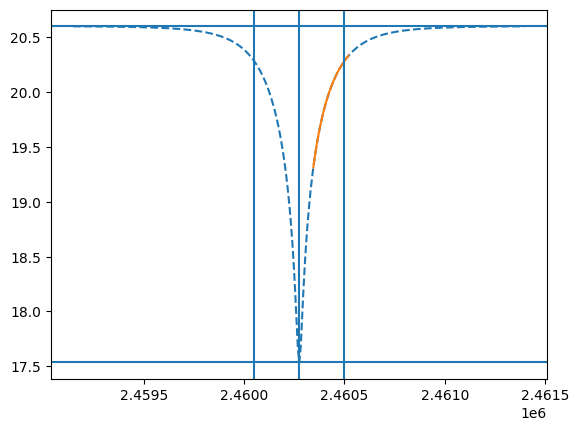

In [269]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(time, magnitudes_all, ls='--')
plt.plot(time_sub, mags, ls='-')
plt.axvline(x=t_0)
plt.axvline(x=t_0 - t_E)
plt.axvline(x=t_0 + t_E)
plt.axhline(y=sem_2023B["mag_peak"].values[i])
plt.axhline(y=sem_2023B["baseline_magnitude"].values[i])
plt.show()